<a href="https://colab.research.google.com/github/MarceloClaro/CLUSTERIZAR-COR-INPE/blob/master/determinarcorinpe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install colour-science

In [ ]:
import os
from collections import Counter
import colour
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from PIL import ImageColor

In [ ]:
def rgb2hex(rgb):
    hex = "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
    # hex = f"#{rgb[0]}{}{}"
    return hex

In [ ]:
rgb = [1, 2, 3]
hex = ["#"]
[hex.append(f"{c:}") for c in rgb]
''.join(hex)

In [ ]:
PATH = './Prancheta 1@72x-100.jpg'
WIDTH = 228
HEIGHT = 228
CLUSTERS = 10


In [ ]:
image = Image.open(PATH)

image.size

print("Loaded {f} image. Size: {s:.2f} KB. Dimensions: ({d})".format(
    f=image.format, s=os.path.getsize(PATH)/1024, d=image.size))

image

In [ ]:
def calculate_new_size(image):
    if image.width >= image.height:
        wpercent = (WIDTH / float(image.width))
        hsize = int((float(image.height) * float(wpercent)))
        new_width, new_height = WIDTH, hsize
    else:
        hpercent = (HEIGHT / float(image.height))
        wsize = int((float(image.width) * float(hpercent)))
        new_width, new_height = wsize, HEIGHT
        
    image.resize((new_width, new_height), Image.ANTIALIAS)
    return image, new_width, new_height


In [ ]:
new_image, new_width, new_height = calculate_new_size(image)
print(f"New dimensions: {new_width}x{new_height}")
img_array = np.array(new_image)
img_vector = img_array.reshape((img_array.shape[0] * img_array.shape[1], 3))
new_image

In [ ]:
model = KMeans(n_clusters=CLUSTERS)
labels = model.fit_predict(img_vector)
label_counts = Counter(labels)
model.cluster_centers_

In [ ]:
total_count = sum(label_counts.values())
total_count

In [ ]:
hex_colors = [rgb2hex(center) for center in model.cluster_centers_]
hex_colors

In [ ]:
list(zip(hex_colors, list(label_counts.values())))


In [ ]:
plt.figure(figsize=(14, 8))

In [ ]:
plt.subplot(221)

In [ ]:
plt.imshow(image)

In [ ]:
plt.axis('off')

In [ ]:
plt.subplot(222)

In [ ]:
plt.pie(label_counts.values(), labels=hex_colors, colors=[color / 255 for color in model.cluster_centers_],
        autopct='%1.1f%%',
        shadow=True, startangle=90)

In [ ]:
plt.axis('equal')

In [ ]:
plt.title('CORES DO SOLO')

In [ ]:
plt.show()

ENCONTREI A FUNÇÃO PARA TRANSFORMAR RGB PARA MUNSELL

In [ ]:
import colour

C = colour.ILLUMINANTS['CIE 1931 2 Degree Standard Observer']['C']

RGB = (0.96820063, 0.74966853, 0.60617991)

print(colour.xyY_to_munsell_colour(colour.XYZ_to_xyY(colour.sRGB_to_XYZ(RGB, C))))

CÓDIGO COMPLETO PARA PLOTAGEM

Loaded JPEG image. Size: 585.27 KB. Dimensions: ((612, 792))
New dimensions: 176x228


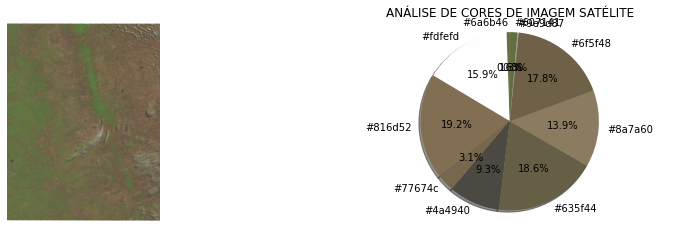

In [ ]:
import os
from collections import Counter
import colour
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from PIL import ImageColor
def rgb2hex(rgb):
    hex = "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
    # hex = f"#{rgb[0]}{}{}"
    return hex
rgb = [1, 2, 3]
hex = ["#"]
[hex.append(f"{c:}") for c in rgb]
''.join(hex)
PATH = './Prancheta 1@72x-100.jpg'
WIDTH = 228
HEIGHT = 228
CLUSTERS = 10
image = Image.open(PATH)

image.size

print("Loaded {f} image. Size: {s:.2f} KB. Dimensions: ({d})".format(
    f=image.format, s=os.path.getsize(PATH)/1024, d=image.size))

image
def calculate_new_size(image):
    if image.width >= image.height:
        wpercent = (WIDTH / float(image.width))
        hsize = int((float(image.height) * float(wpercent)))
        new_width, new_height = WIDTH, hsize
    else:
        hpercent = (HEIGHT / float(image.height))
        wsize = int((float(image.width) * float(hpercent)))
        new_width, new_height = wsize, HEIGHT
        
    image.resize((new_width, new_height), Image.ANTIALIAS)
    return image, new_width, new_height
new_image, new_width, new_height = calculate_new_size(image)
print(f"New dimensions: {new_width}x{new_height}")
img_array = np.array(new_image)
img_vector = img_array.reshape((img_array.shape[0] * img_array.shape[1], 3))
new_image
model = KMeans(n_clusters=CLUSTERS)
labels = model.fit_predict(img_vector)
label_counts = Counter(labels)
model.cluster_centers_
total_count = sum(label_counts.values())
total_count
hex_colors = [rgb2hex(center) for center in model.cluster_centers_]
hex_colors
list(zip(hex_colors, list(label_counts.values())))
plt.figure(figsize=(14, 8))
plt.subplot(221)
plt.imshow(image)
plt.axis('off')
plt.subplot(222)
plt.pie(label_counts.values(), labels=hex_colors, colors=[color / 255 for color in model.cluster_centers_],
        autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')
plt.title('ANÁLISE DE CORES DE IMAGEM SATÉLITE')
plt.show()